In [1]:
from pathlib import Path
import gc
from matplotlib import pyplot as plt 
import numpy as np
import random
import math

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
if torch.cuda.is_available():
    device = "cuda" 
else:
    device = "cpu"
print(device)

cuda


In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

In [4]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = Path("drive")
    data_path/="MyDrive"
    data_path/="Data"
else:
    data_path = Path("Data")

In [5]:
for file_path in data_path.iterdir():
    if file_path.is_file():
        file_path_str = str(file_path)
        if "test" in file_path_str:
            test_path = file_path
        elif "train" in file_path_str:
            train_path = file_path
        elif "valid" in file_path_str:
            valid_path = file_path
        else:
            words_path = file_path
print(test_path, train_path, valid_path, words_path)

Data\ptb.test.txt Data\ptb.train.txt Data\ptb.valid.txt Data\words.txt


In [6]:
from LSTM_module import Trainer

In [7]:
trainer = Trainer(device=device)

In [8]:
trainer.load_dictionary(words_path)

print(f'bos: {trainer.words_dict["<bos>"]}, eos: {trainer.words_dict["<eos>"]}, eps: {trainer.words_dict["<eps>"]}, unk: {trainer.words_dict["<unk>"]}')

print(trainer.vocab_size)

bos: 1, eos: 10004, eps: 0, unk: 3
10005


In [9]:
trainer.load_data(train_path, data_type="train")
trainer.load_data(valid_path, data_type="valid")
trainer.load_data(test_path, data_type="test")

In [10]:
trainer.init_model()

In [11]:
trainer.init_train()

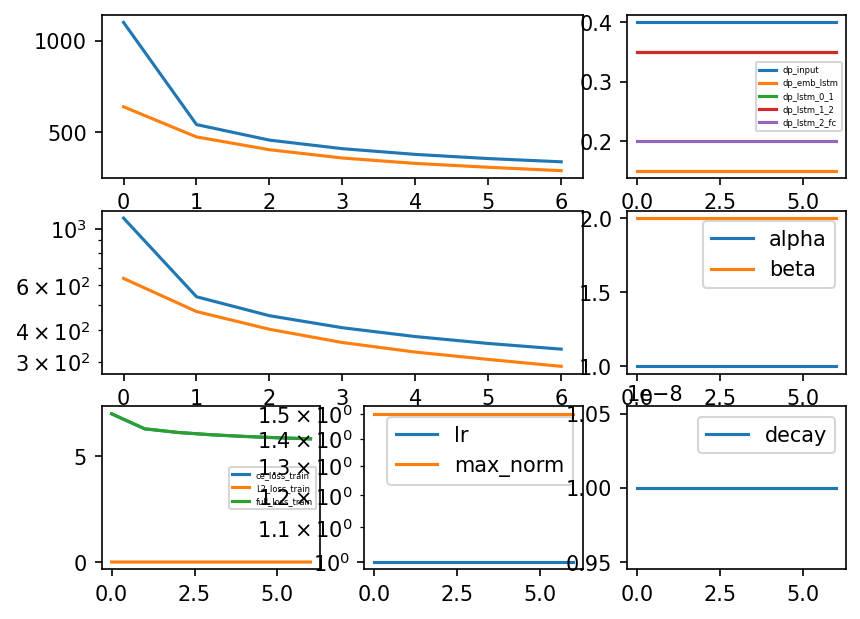

min val ppx:  288.67; last val ppx: 288.67 last train ppx: 337.12
total elapsed time:  2 mins 10 seconds
Epoch: 3|||0|5|

In [ ]:
trainer.train(10)